In [1]:
import os
import glob
import numpy as np
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf 

In [2]:
categories_text = open('/content/drive/My Drive/category_mini.txt','r')
categories = categories_text.readlines()
categories_text.close()

In [3]:
categories = [c.replace('\n', '').replace(' ','_').replace("'", "").replace(',', '') for c in categories]

In [4]:
!mkdir npy

mkdir: cannot create directory ‘npy’: File exists


In [5]:
test_category = categories[:5]

In [6]:
test_category

['ant', 'bat', 'bear', 'bee', 'bird']

In [7]:
import urllib.request


def download():
  base = 'https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/'
  counter = 1
  for i in test_category:
    space = i.replace('_', '%20')
    path = base+space+'.npy'
    print(f'{path} {counter}/{len(test_category)}')
    counter += 1
    urllib.request.urlretrieve(path, 'npy/'+i+'.npy')

In [8]:
download()

https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/ant.npy 1/5
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bat.npy 2/5
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bear.npy 3/5
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bee.npy 4/5
https://storage.googleapis.com/quickdraw_dataset/full/numpy_bitmap/bird.npy 5/5


In [9]:
all_files = glob.glob(os.path.join('npy', '*.npy'))

In [10]:
X = np.empty([0, 784])
y = np.empty([0])
label_names = []

for idx, file in enumerate(all_files):
  data = np.load(file)
  data = data[0: 5000, :]
  labels = np.full(data.shape[0], idx)

  X = np.concatenate((X, data), axis=0)
  y = np.append(y, labels)

  X /= 255.0
  
  label_name, extension = os.path.splitext(os.path.basename(file))
  label_names.append(label_name)

10982
ant


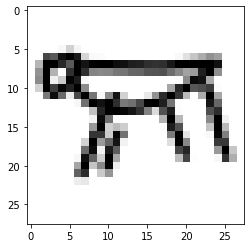

In [11]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, X.shape[0])
print(idx)
plt.imshow(X[idx].reshape(28,28), cmap='binary')
print(label_names[int(y[idx].item())])


In [12]:
y.shape

(25000,)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.20, random_state=24)


In [14]:
y_test.shape

(5000,)

In [22]:
X_train = tf.reshape(X_train, [-1,28,28,1])
X_test = tf.reshape(X_test, [-1,28,28,1])
# X_train /= 255.0
# X_test  /= 255.0

In [16]:
# X_train[0][0]

In [17]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=len(label_names))
y_test = tf.keras.utils.to_categorical(y_test, num_classes=len(label_names))
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

In [18]:
print(f'{y_test.shape}.{y_train.shape}')
print(f'{X_test.shape},{X_train.shape}')
y_train.shape

(5000, 5).(20000, 5)
(5000, 28, 28, 1),(20000, 28, 28, 1)


(20000, 5)

In [19]:
# train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
# test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

# BATCH_SIZE = 64
# SHUFFLE_BUFFER_SIZE = 100

# train_dataset = train_dataset.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
# test_dataset = test_dataset.batch(BATCH_SIZE)


In [20]:
model = keras.Sequential()
model.add(layers.Convolution2D(16, (3,3),
                               padding='same',
                               input_shape=X_train.shape[1:], activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Convolution2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(81, activation='softmax'))

adam = tf.optimizers.Adam()
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['top_k_categorical_accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 576)               0

In [21]:
model.fit(x=X_train, y=y_train, batch_size=256, validation_split=0.1, verbose=2, epochs=5)

Epoch 1/5


ValueError: ignored

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy: {:0.2f}%'.format(score[1] * 100))

24451
bear


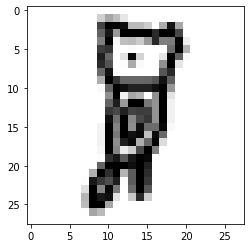

In [23]:
import matplotlib.pyplot as plt
from random import randint
%matplotlib inline
idx = randint(0, X.shape[0])
print(idx)
plt.imshow(X[idx].reshape(28,28), cmap='binary')
print(label_names[int(y[idx].item())])
